In [1]:
import matplotlib.pyplot as plt
plt.style.use('presentation') # https://matplotlib.org/users/customizing.html
%matplotlib inline
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

[sklearn.datasets.make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

[sklearn.datasets.make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)

[sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [2]:
X, y, coef = make_regression(n_samples=50,
                       n_features=1,
                       n_informative=1,
                       noise=10.0,
                       shuffle=False,
                       coef=True)

In [3]:
from sklearn.preprocessing import scale
X_scaled = scale(X)
reg_intercept = LinearRegression(fit_intercept=True)
reg_intercept.fit(X_scaled, y)
reg = LinearRegression(fit_intercept=False)
reg.fit(X_scaled, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

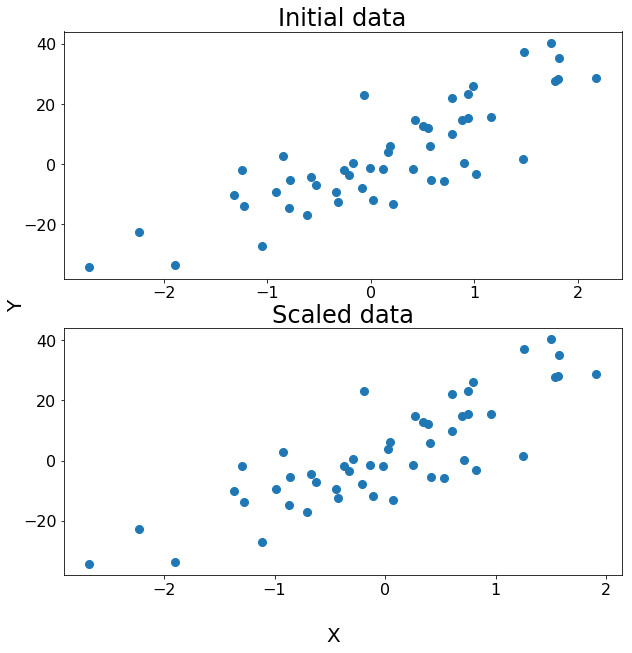

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(211)
ax_scaled = fig.add_subplot(212)
ax.plot(X[:, 0], y, 'o')
ax_scaled.plot(X_scaled[:, 0], y, 'o')
fig.text(0.5, 0.04, 'X', ha='center', va='center', fontsize=20)
fig.text(0.06, 0.5, 'Y', ha='center', va='center', rotation='vertical', fontsize=20)
ax.set_title('Initial data')
ax_scaled.set_title('Scaled data')
plt.show()

In [5]:
print(reg_intercept.coef_, reg_intercept.intercept_) 

[14.61680603] 2.5481602440123146


In [6]:
print(reg.coef_, reg.intercept_)

[14.61680603] 0.0


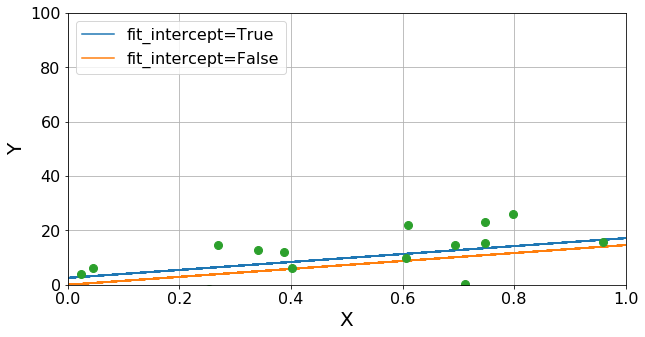

In [7]:
plt.figure(figsize=(10, 5))

plt.plot(X_scaled[:,0],
         reg_intercept.coef_ * X_scaled[:,0] + reg_intercept.intercept_,
         label='fit_intercept=True')
plt.plot(X_scaled[:,0], reg.coef_ * X_scaled[:,0] + reg.intercept_,
         label='fit_intercept=False' )
plt.plot(X_scaled[:,0], y, 'o')
plt.legend(loc=2)
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [8]:
import numpy as np

@np.vectorize
def scuared_hyperbola(x):
    return 1. / (1. + 25. * x ** 2)

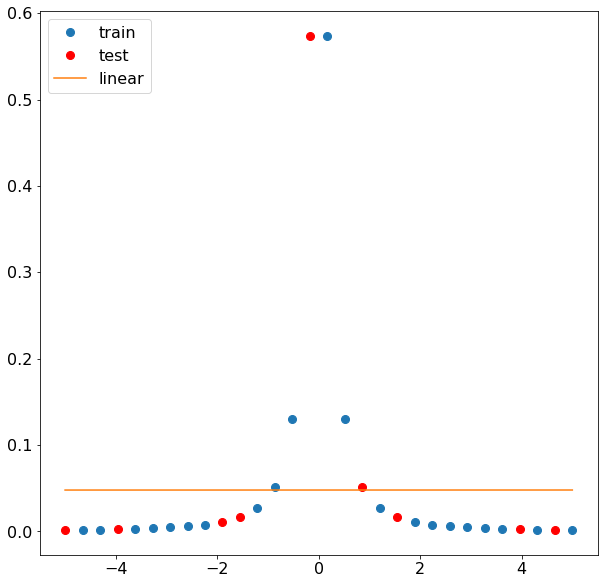

In [9]:
from sklearn.model_selection import train_test_split

X = np.linspace(-5, 5, 30).reshape((30, 1))
y = scuared_hyperbola(X.ravel())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

plt.figure(figsize=(10, 10))
plt.plot(X_train.ravel(), y_train, 'o', label='train')
plt.plot(X_test.ravel(), y_test, 'o', label='test', color='red')
plt.plot(X.ravel(), X.ravel() * reg.coef_ + reg.intercept_, label='linear')
plt.legend(loc=2)
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures

[sklearn.preprocessing.PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [11]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X_poly2 = poly.fit_transform(X)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly2, y, test_size=0.3)
X_poly2[0:2,:]

array([[ 1.        , -5.        , 25.        ],
       [ 1.        , -4.65517241, 21.6706302 ]])

In [12]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train2, y_train2)
print(reg.coef_, reg.intercept_)

[ 0.08786599 -0.00069651 -0.00572896] 0.0


In [13]:
y_poly2 = X_poly2.dot(reg.coef_.reshape((3, 1))).ravel() +reg.intercept_

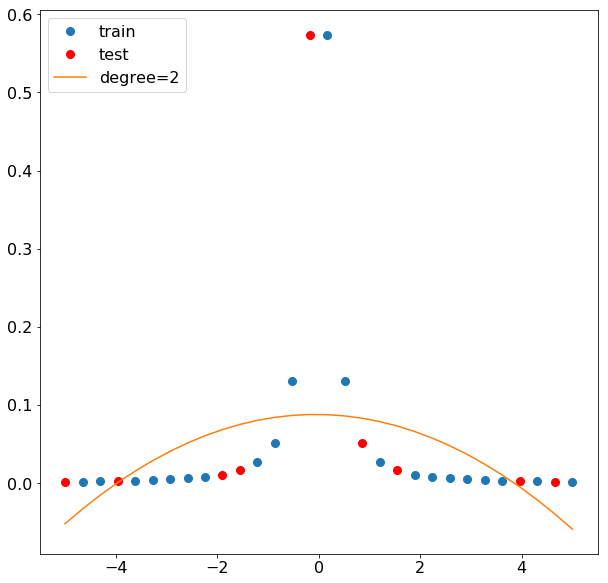

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(X_train.ravel(), y_train, 'o', label='train')
plt.plot(X_test.ravel(), y_test, 'o', label='test', color='red')
plt.plot(X.ravel(), y_poly2, label='degree=2')
plt.legend(loc=2)
plt.show()

In [15]:
poly.set_params(degree=11)
X_poly11 = poly.fit_transform(X)
X_train11, X_test11, y_train11, y_test11 = train_test_split(X_poly11, y, test_size=0.3)
X_poly11[0:1,:]

array([[ 1.0000000e+00, -5.0000000e+00,  2.5000000e+01, -1.2500000e+02,
         6.2500000e+02, -3.1250000e+03,  1.5625000e+04, -7.8125000e+04,
         3.9062500e+05, -1.9531250e+06,  9.7656250e+06, -4.8828125e+07]])

In [16]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train11, y_train11)
print(reg.coef_, reg.intercept_)

[ 2.88958885e-01  5.08910828e-02 -2.44552991e-01 -4.60400319e-02
  6.10615816e-02  1.13108625e-02 -6.19371315e-03 -1.12901821e-03
  2.70799506e-04  4.89543535e-05 -4.23345536e-06 -7.62983582e-07] 0.0


In [17]:
y_poly11 = X_poly11.dot(reg.coef_.reshape((len(reg.coef_), 1))).ravel() +reg.intercept_

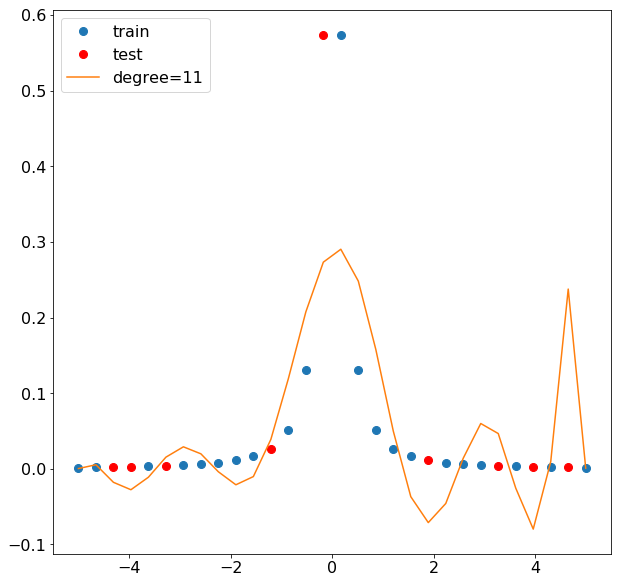

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(X_train11[:, 1], y_train11, 'o', label='train')
plt.plot(X_test11[:, 1], y_test11, 'o', label='test', color='red')
plt.plot(X.ravel(), y_poly11, label='degree=11')
plt.legend(loc=2)
plt.show()

In [19]:
poly.set_params(degree=20)
X_poly20 = poly.fit_transform(X)
X_train20, X_test20, y_train20, y_test20 = train_test_split(X_poly20, y, test_size=0.3)
X_poly20.shape

(30, 21)

In [20]:
reg.fit(X_train20, y_train20)
y_poly20 = X_poly20.dot(reg.coef_.reshape((len(reg.coef_), 1))).ravel() +reg.intercept_

In [21]:
print(reg.coef_, reg.intercept_)

[ 5.29850665e-01 -3.67727214e-01 -1.15982296e+00  4.86431158e-01
  5.26124235e-01 -1.10361397e-01  5.70320718e-01  2.18500285e-01
 -4.83905129e-01 -2.02865969e-01  1.19711617e-01  6.23083032e-02
 -1.17941660e-02 -8.81552950e-03  2.64417326e-04  6.33291974e-04
  3.18681243e-05 -2.23542242e-05 -2.15819491e-06  3.05479931e-07
  3.82361687e-08] 0.0


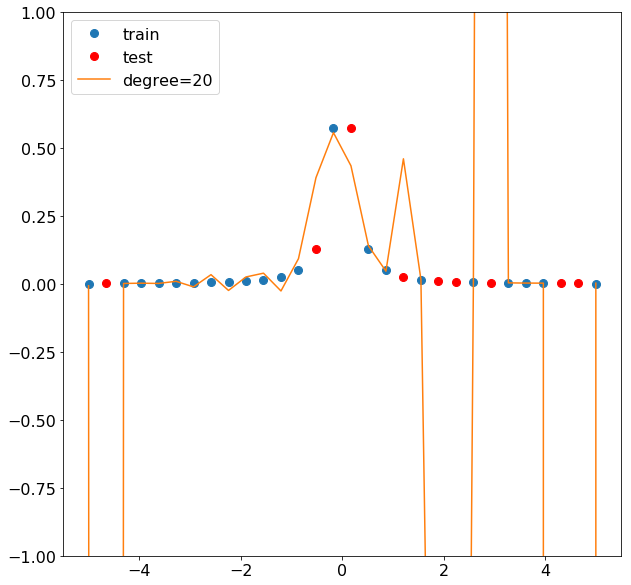

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(X_train20[:, 1], y_train20, 'o', label='train')
plt.plot(X_test20[:, 1], y_test20, 'o', label='test', color='red')
plt.plot(X.ravel(), y_poly20, label='degree=20')
plt.legend(loc=2)
plt.ylim(-1, 1)
plt.show()

In [23]:
from sklearn.linear_model import Lasso

[sklearn.linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.Lasso)

In [24]:
reg = Lasso(alpha=1.e-2, fit_intercept=False)
reg.fit(X_train20, y_train20)
reg.coef_

/home/sggpls/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 1.23540177e-01,  0.00000000e+00, -3.01224522e-02,  3.28166040e-06,
        1.93712873e-03, -1.22732967e-05, -1.23557059e-05,  4.34329018e-07,
       -1.00430923e-06,  3.06675680e-08, -1.53952188e-08,  4.34150321e-10,
       -6.82047458e-11, -6.12396993e-12,  5.90648319e-12, -6.85251971e-13,
        3.25187277e-13, -3.24849996e-14,  1.23920302e-14, -1.25204826e-15,
        4.16776660e-16])

In [25]:
y_poly20lasso = X_poly20.dot(reg.coef_.reshape((len(reg.coef_), 1))).ravel() +reg.intercept_

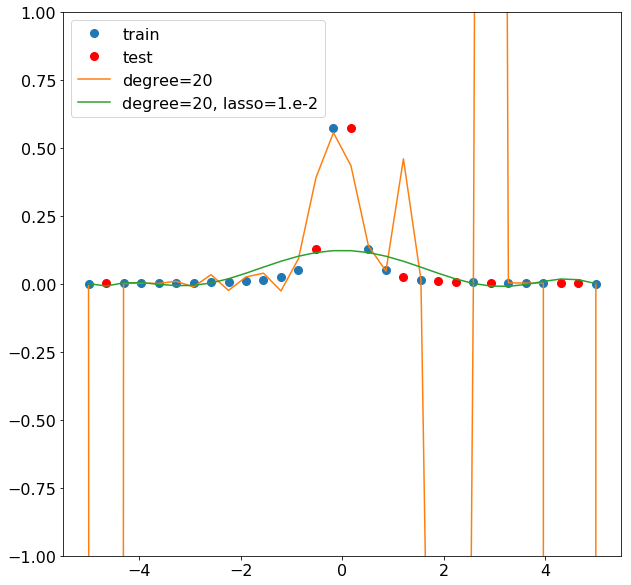

In [26]:
plt.figure(figsize=(10, 10))
plt.plot(X_train20[:, 1], y_train20, 'o', label='train')
plt.plot(X_test20[:, 1], y_test20, 'o', label='test', color='red')
plt.plot(X.ravel(), y_poly20, label='degree=20')
plt.plot(X.ravel(), y_poly20lasso, label='degree=20, lasso=1.e-2')
plt.ylim(-1, 1)
plt.legend(loc=2)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.datasets import make_classification

[sklearn.datasets.make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

[sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[sklearn.linear_model.LogisticRegressionCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

In [28]:
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           shift=3.0)

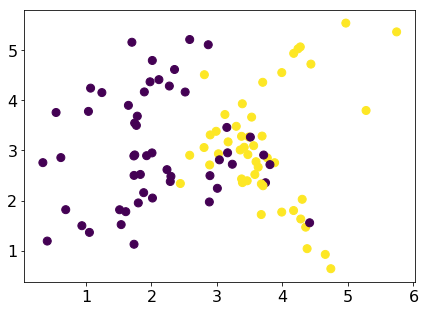

In [29]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

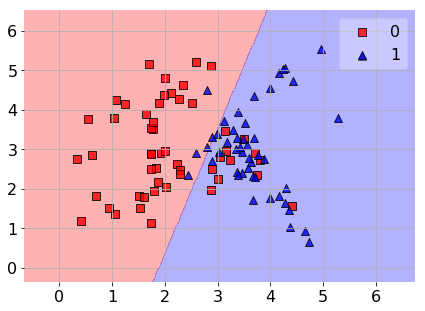

In [30]:
from mlxtend.plotting import plot_decision_regions
log_int = LogisticRegression(fit_intercept=True)
log_int.fit(X, y)
plt.figure(figsize=(7, 5))
plot_decision_regions(X, y, log_int) # https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
plt.grid(True)

In [31]:
print(log_int.coef_, log_int.intercept_)

[[ 1.38940831 -0.43788313]] [-2.62823699]


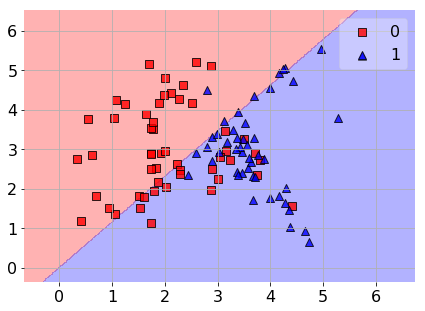

In [32]:
from mlxtend.plotting import plot_decision_regions
log = LogisticRegression(fit_intercept=False)
log.fit(X, y)
plt.figure(figsize=(7, 5))
plot_decision_regions(X, y, log)
plt.grid(True)

In [33]:
print(log.coef_, log.intercept_)

[[ 0.99647818 -0.86277393]] 0.0


In [34]:
print(log.score(X, y), log_int.score(X, y))

0.73 0.83


In [35]:
def map_features(f1, f2, order=1):
    '''map the f1 and f2 to its higher order polynomial'''
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(f1, i - j) * np.power(f2, j)
    return np.vstack(iter())

In [47]:
def draw_boundary(X, y, classifier, order=1):
    dimy = np.linspace(X[:,0].min() - X[:, 0].std(), X[:,0].max() + X[:, 0].std(), 1000)
    dimx = np.linspace(X[:,1].min() - X[:, 1].std(), X[:,1].max() + X[:, 1].std(), 1000)
    dx, dy = np.meshgrid(dimx, dimy)
    X_poly = map_features(X[:,0], X[:,1], order=order).T
    classifier.fit(X_poly, y)
    v = map_features(dx.flatten(), dy.flatten(), order=order)
    z = (np.dot(classifier.coef_, v) + classifier.intercept_).reshape(1000, 1000)
    CS = plt.contour(dx, dy, z, levels=[0], colors=['r'])
    plt.scatter(X[:, 0], X[:, 1], c=y)
    return classifier.score(X_poly, y)

In [37]:
X_poly2 = map_features(X[:,0], X[:,1], order=2).T

0.84


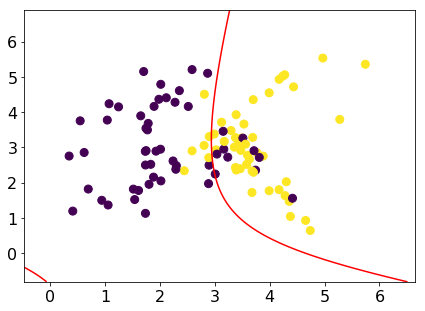

In [48]:
clf = LogisticRegression(fit_intercept=True)
plt.figure(figsize=(7, 5))
score = draw_boundary(X, y, clf, order=2)
print(score)

0.88


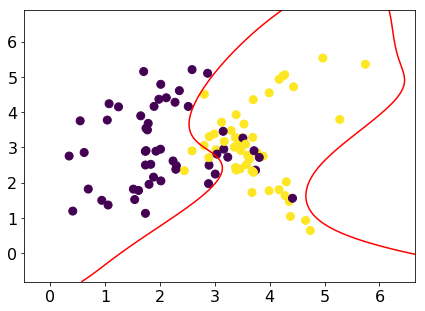

In [49]:
plt.figure(figsize=(7, 5))
score = draw_boundary(X, y, clf, order=5)
print(score)

0.87


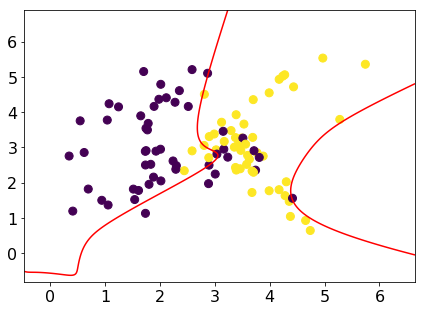

In [50]:
plt.figure(figsize=(7, 5))
score = draw_boundary(X, y, clf, order=10)
print(score)

0.84


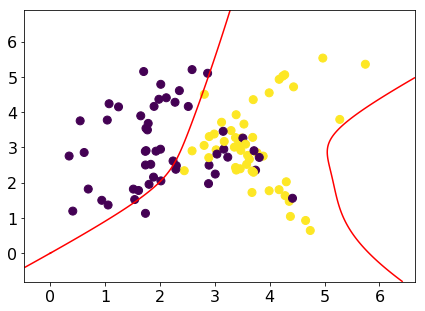

In [52]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(C=1.e-4, penalty='l1', fit_intercept=True)
score = draw_boundary(X, y, clf, order=10)
print(score)

0.83


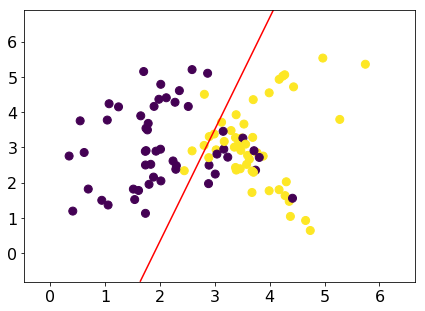

In [60]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=1)
print(score)

0.84


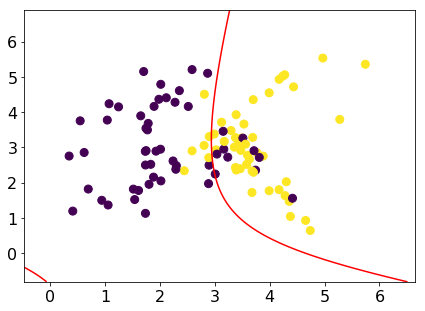

In [61]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=2)
print(score)

0.86


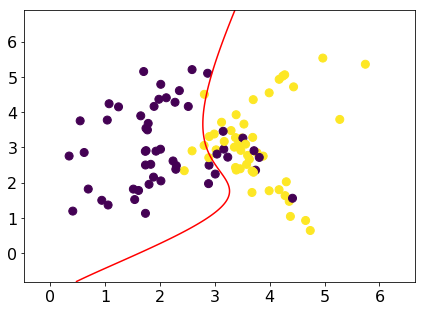

In [62]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=3)
print(score)

0.88


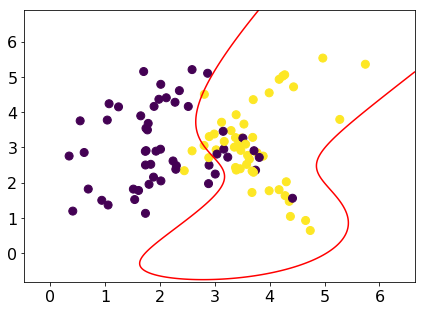

In [64]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=4)
print(score)

0.88


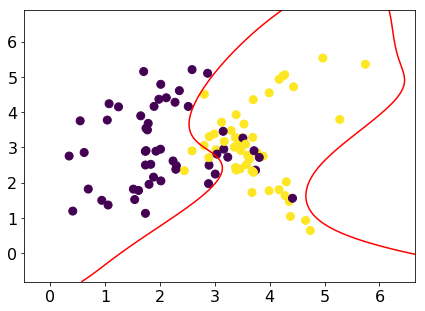

In [65]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=5)
print(score)

0.89


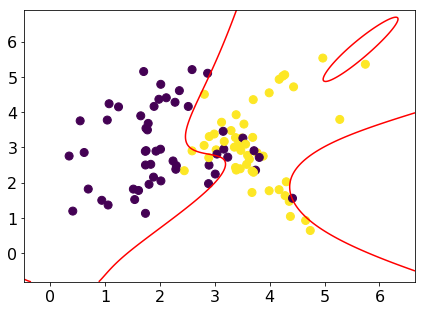

In [66]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=6)
print(score)

0.9


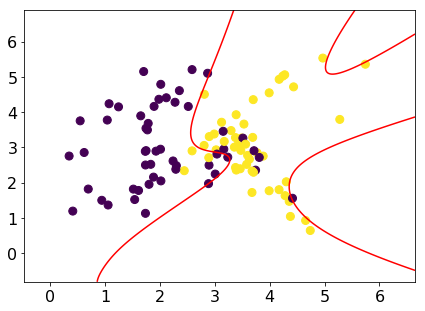

In [67]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=7)
print(score)

0.88


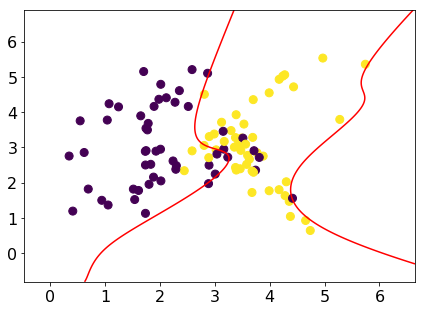

In [68]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=8)
print(score)

0.85


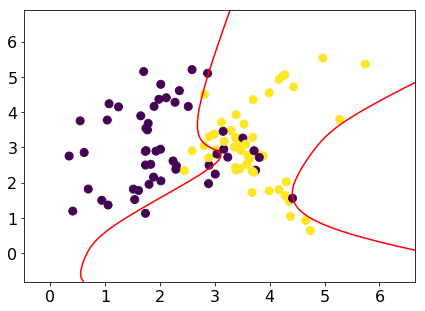

In [69]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=9)
print(score)

0.87


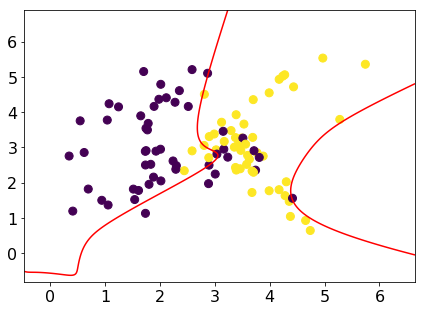

In [70]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=10)
print(score)

0.85


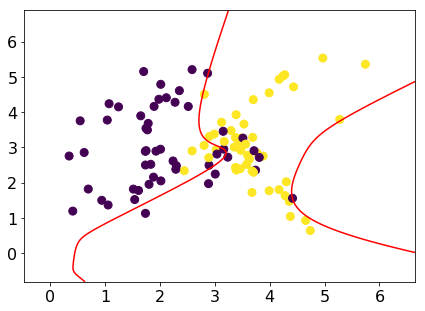

In [71]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=11)
print(score)

0.85


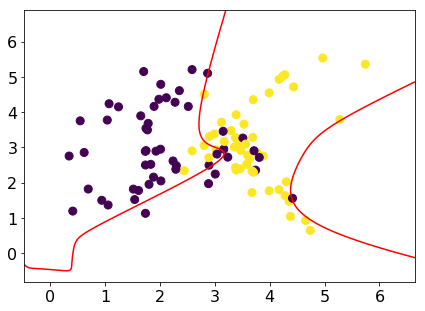

In [72]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=12)
print(score)

In [74]:
from sklearn.datasets import make_circles

[sklearn.datasets.make_circles](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)

In [102]:
X, y = make_circles(n_samples=100, noise=.3, factor=0.2)

0.54


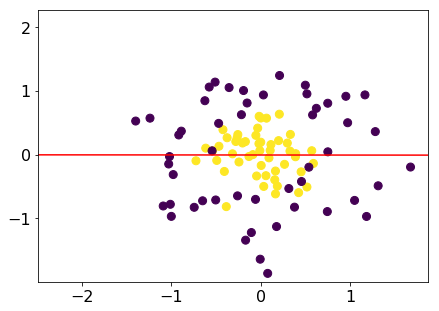

In [103]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=1)
print(score)

[[ 0.11101632 -0.13209117 -2.49957658 -0.12741625 -2.77445983]]
0.9


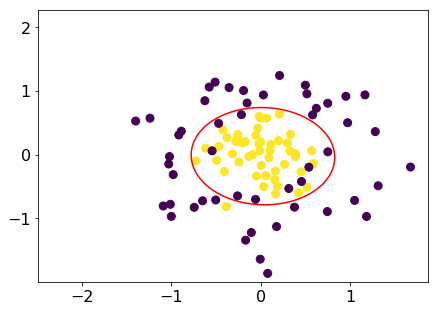

In [112]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=2)
print(clf.coef_)
print(score)

0.9


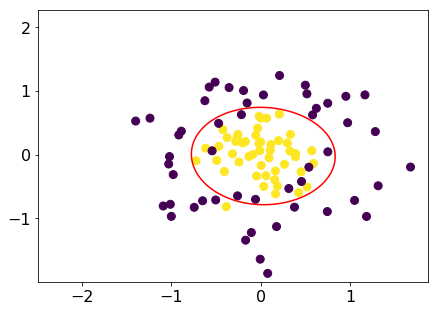

In [105]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=3)
print(score)

0.9


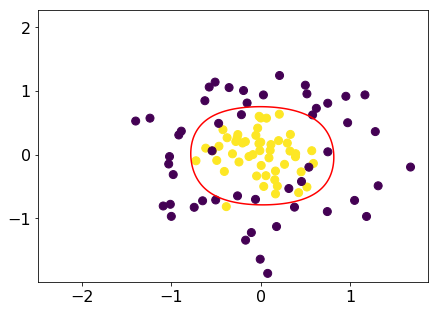

In [106]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=4)
print(score)

0.9


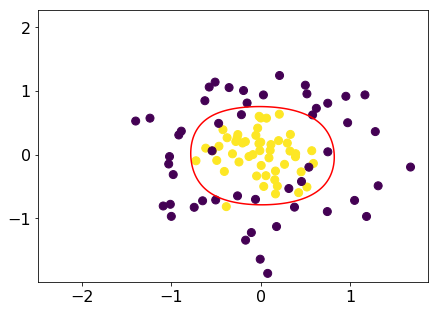

In [107]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True)
score = draw_boundary(X, y, clf, order=5)
print(score)

[[ 0.          0.         -4.34222296  0.         -4.6393816 ]]
0.9


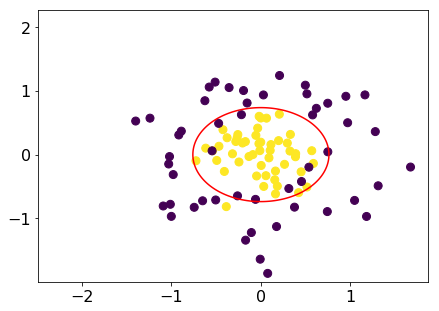

In [111]:
plt.figure(figsize=(7, 5))
clf = LogisticRegression(fit_intercept=True, penalty='l1')
score = draw_boundary(X, y, clf, order=2)
print(clf.coef_)
print(score)

[sklearn.Base](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.base)